# Label Bias

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

We will sample, (x,a,z,y)

In [4]:
expt_name = 'label_bias_model1'

In [6]:
# %%writefile label_bias_model1
# we will have a=1 be the disadvantaged group
rho_a = .4 # portion of disadvantaged group 
p_a = [1-rho_a, rho_a]
rho_z = .2 # portion of allocation of target variable
p_z = [1-rho_z, rho_z]

beta = [0, .2] # label error rate for each group, 0, x means only error in one group
N = 200 # number of samples
mu = [[1,4],[4,1]]
cov = [[2,0],[0,2]]

a = np.random.choice([0,1], p=p_a, size=N)
z = np.random.choice([0,1], p=p_z, size=N)
x = [np.random.multivariate_normal(mu[z_i],cov) for z_i in z]
# p_y = {0:lambda z, 1:n}
y = [np.random.choice([zi,1-zi],p=[1-beta[ai], beta[ai]]) for ai,zi in zip(a,z)]
data = np.asarray([a,z,y]).T
x = np.asarray(x)
df = pd.DataFrame(data=data, columns = ['a','z','y'])

df['x0'] = x[:,0]
df['x1'] = x[:,1]

In [7]:
df.head()

,a,z,y,x0,x1
0,1,1,1,5.292036,2.046143
1,1,0,0,2.322618,4.224588
2,1,1,1,4.688681,-2.359233
3,0,0,0,-0.977010,2.906632
4,0,0,0,-0.265764,4.082519


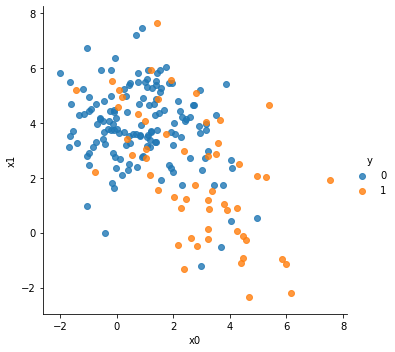

In [8]:
sns.lmplot('x0','x1',df,hue = 'y',fit_reg=False)

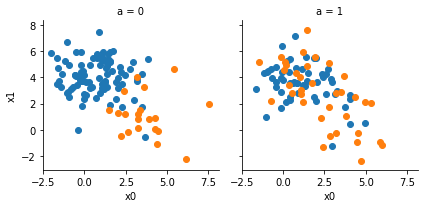

In [9]:
g = sns.FacetGrid(df, col="a",hue = 'y')
g = g.map(plt.scatter, "x0", "x1")

In [9]:
df.to_csv('label_bias_model1.csv')